  # THE PRICE IS RIGHT

In [23]:
import pandas as pd

In [24]:
import sqlite3

In [25]:
import glob

In [26]:
import matplotlib.pyplot as plt

In [27]:
import numpy

In [76]:
import urllib.request

## import Showcase data from Excel

In [28]:
ShowcaseStats = pd.read_csv("https://raw.githubusercontent.com/koryvette/python/master/project/Showcase_spin.csv")

In [29]:
ShowcaseStats.head()

,Season,First_spinner_won,Second_spinner_won,Third_spinner_won
0,29,92,115,121
1,30,93,133,124
2,31,103,129,118
3,32,106,114,130
4,33,119,106,125


## read to SQLite

In [30]:
import sqlite3

In [31]:
con = sqlite3.connect('priceisright.db')

In [32]:
df_win = pd.read_csv('https://raw.githubusercontent.com/koryvette/python/master/project/output.csv')

In [33]:
df_win.head()

,season,game,win,loss
0,29,Any_Number,12,15
1,29,Balance_Game,0,0
2,29,Barkers_Bargain_Bar,23,8
3,29,Barkers_MarkerS,3,5
4,29,Bonkers,0,0


In [34]:
df_win.to_sql('Games',con, if_exists='replace') 

### These are the results intend to chart.  This will show the win percentage of each year of the Price Is Right since 2000.

In [35]:
season_results = con.execute('SELECT Season, sum(Win) AS WIN_Total, sum(Loss) AS [LOSS_Total], (sum(Win) + sum(Loss)) AS [TOTAL_Played] from Games'\
                       ' GROUP BY Season')
for row in season_results:
    season = row[0]
    year = row[0] + 1971
    wins = row[1]
    losses = row[2]
    games = row[3]
    win_pct = 100 * (wins / games)
    
    print(season, year, wins, win_pct, games)

    

29 2000 948 48.170731707317074 1968
30 2001 1042 49.61904761904762 2100
31 2002 1000 47.61904761904761 2100
32 2003 1030 49.047619047619044 2100
33 2004 1036 49.333333333333336 2100
34 2005 1000 47.61904761904761 2100
35 2006 1000 47.61904761904761 2100
36 2007 1068 46.8421052631579 2280
37 2008 920 40.139616055846425 2292
38 2009 830 36.40350877192983 2280
39 2010 796 34.91228070175438 2280
40 2011 900 39.26701570680628 2292
41 2012 970 42.7689594356261 2268
42 2013 974 42.719298245614034 2280
43 2014 1050 46.05263157894737 2280
44 2015 1056 46.519823788546255 2270
45 2016 1048 46.00526777875329 2278
46 2017 1024 44.91228070175438 2280


In [37]:
season_graph = con.execute('SELECT Season, sum(Win) AS WIN_Total, sum(Loss) AS [LOSS_Total], (sum(Win) + sum(Loss)) AS [TOTAL_Played] from Games'\
                       ' GROUP BY Season')

seasonArray = []
winpctArray = []

for row in season_graph:
    startingInfo = str(row).replace(')','').replace('(','').replace('u\'','').replace("'","")
    splitInfo = startingInfo.split(',')
    seasonAppend = (int(splitInfo[0])+1971)
    winpctAppend = ((int(splitInfo[1])) / (int(splitInfo[3])))*100
    seasonArray.append(seasonAppend)
    winpctArray.append(winpctAppend)
    
print(seasonArray)
print(winpctArray)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
[48.170731707317074, 49.61904761904762, 47.61904761904761, 49.047619047619044, 49.333333333333336, 47.61904761904761, 47.61904761904761, 46.8421052631579, 40.139616055846425, 36.40350877192983, 34.91228070175438, 39.26701570680628, 42.7689594356261, 42.719298245614034, 46.05263157894737, 46.519823788546255, 46.00526777875329, 44.91228070175438]


In [77]:
x = seasonArray
y = winpctArray
im = plt.imread(urllib2.urlopen("https://github.com/koryvette/python/blob/master/project/img3.jpg"), format='jpeg')

plt.figure(figsize=(10,7), dpi=80)
plt.plot(x,y, label='Season',color='limegreen', marker='h', markersize=8)

plt.xlabel('Season')
plt.ylabel('Win Pct')
plt.title('Win Pct by SEASON')
plt.legend()


plt.imshow(im,zorder=0)
plt.show()

NameError: name 'urllib2' is not defined

### Now we need to find out which game presents the best opportunity to win during that year.

In [64]:
df_game_results = con.execute('SELECT Game, sum(Win) AS WIN_Total, sum(Loss) AS LOSS_Total, (sum(Win) + sum(Loss)) AS [TOTAL_Played] from Games'\
                       ' GROUP BY Game')
for row in df_game_results:
    Game = row[0]
    gameWins = row[1]
    gameLoss = row[2]
    games_played = row[3]
    win_pct = 100 * gameWins / games_played
    

    print(Game, gameWins,gameLoss, games_played, win_pct)

10_Chances 154 170 324 47.53086419753087
1_Right_Price 462 360 822 56.2043795620438
1_Wrong_Price 390 438 828 47.10144927536232
2_for_the_Price_of_1 130 162 292 44.52054794520548
3_Strikes 54 128 182 29.67032967032967
Any_Number 332 570 902 36.80709534368071
Balance_Game 160 218 378 42.32804232804233
Barkers_Bargain_Bar 526 318 844 62.322274881516584
Barkers_MarkerS 54 48 102 52.94117647058823
Bonkers 222 270 492 45.1219512195122
Bonus_Game 206 86 292 70.54794520547945
Bullseye 318 84 402 79.1044776119403
Buy_or_Sell 76 26 102 74.50980392156863
Card_Game 184 302 486 37.86008230452675
Check-Out 150 228 378 39.682539682539684
Check_Game 120 188 308 38.96103896103896
Clearance_Sale 52 104 156 33.333333333333336
Cliff_Hangers 514 224 738 69.64769647696477
Clock_Game 334 188 522 63.984674329501914
Coming_or_Going 446 298 744 59.946236559139784
Cover_Up 290 584 874 33.18077803203661
Credit_Card 46 64 110 41.81818181818182
Danger_Price 136 214 350 38.857142857142854
Dice_Game 358 368 726 49.3

### This will turn the results of the query into an array.  The arrays will be used to visualize the results of the games played in these seasons.

In [52]:
game_graph = con.execute('SELECT Game, sum(Win) AS WIN_Total, sum(Loss) AS LOSS_Total, (sum(Win) + sum(Loss)) AS [TOTAL_Played] from Games'\
                       ' GROUP BY Game')

gameArray = []
gamepctArray = []

for row in game_graph:
    startInfo = str(row).replace(')','').replace('(','').replace('u\'','')
    gameInfo = startInfo.split(',')
    gameAppend = (gameInfo[0])
    gamepctAppend = ((int(gameInfo[1])) / (int(gameInfo[3])))*100
    gameArray.append(gameAppend)
    gamepctArray.append(gamepctAppend)
    
print(gameArray)
print(gamepctArray)

["'10_Chances'", "'1_Right_Price'", "'1_Wrong_Price'", "'2_for_the_Price_of_1'", "'3_Strikes'", "'Any_Number'", "'Balance_Game'", "'Barkers_Bargain_Bar'", "'Barkers_MarkerS'", "'Bonkers'", "'Bonus_Game'", "'Bullseye'", "'Buy_or_Sell'", "'Card_Game'", "'Check-Out'", "'Check_Game'", "'Clearance_Sale'", "'Cliff_Hangers'", "'Clock_Game'", "'Coming_or_Going'", "'Cover_Up'", "'Credit_Card'", "'Danger_Price'", "'Dice_Game'", "'Do_the_Math'", "'Double_Cross'", "'Double_Prices'", "'Eazy_az_1_2_3'", "'Five_Price_Tags'", "'Flip_Flop'", "'Freeze_Frame'", "'Gas_Money'", "'Golden_Road'", "'Grand_Game'", "'Gridlock'", "'Grocery_Game'", "'Half_Off'", "'Hi_Lo'", "'Hit_Me'", "'Hole_in_One'", "'Hot_Seat'", "'Its_in_the_Bag'", "'Joker'", "'Let_em_Roll'", "'Line_em_Up'", "'Lucky_Seven'", "'Magic_Number'", "'Make_Your_Move'", "'Master_Key'", "'Money_Game'", "'More_or_Less'", "'Most_ExpenSive'", "'Now_or_Then'", "'On_the_Spot'", "'One_Away'", "'Pass_The_Buck'", "'Pathfinder'", "'Pay_the_Rent'", "'Penny_Ante'

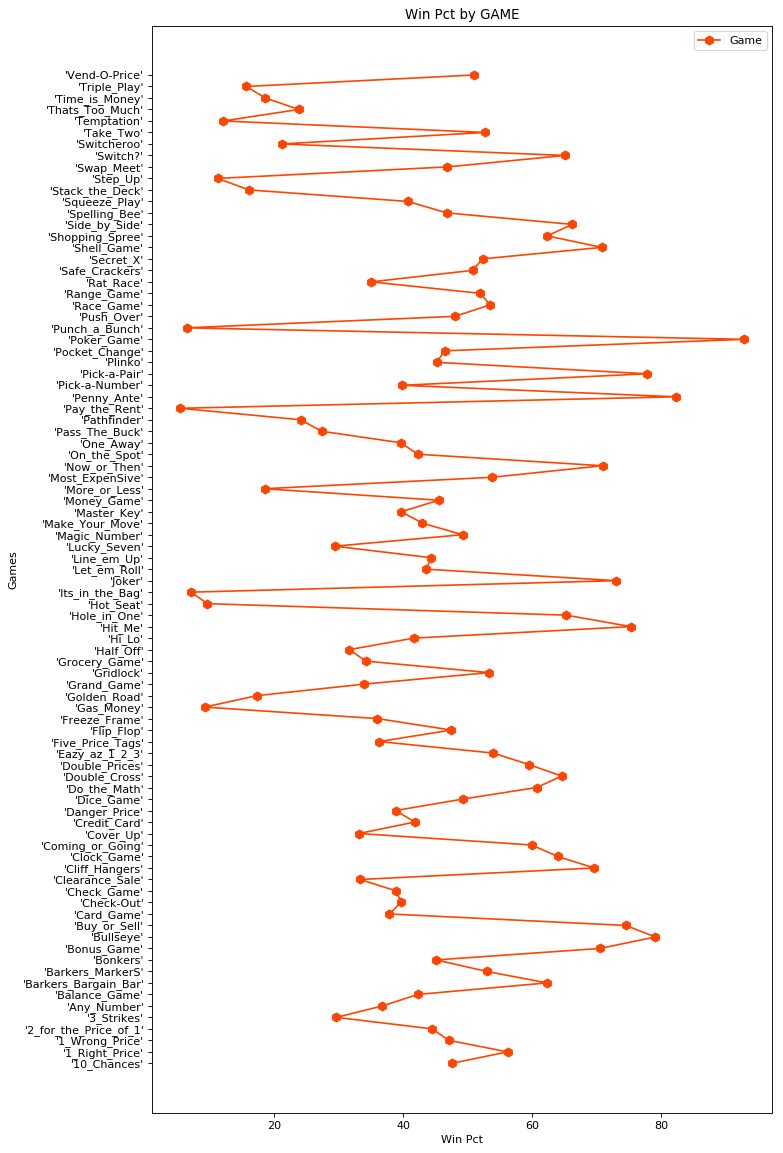

In [60]:
y = gameArray
x = gamepctArray

plt.figure(figsize=(10,18), dpi=80)
plt.plot(x,y, label='Game',color='orangered', marker='h', markersize=8)

plt.ylabel('Games')
plt.xlabel('Win Pct')
plt.title('Win Pct by GAME')
plt.legend()

plt.show()

In [117]:
con.execute('SELECT * from Games')

In [118]:
df_lose = pd.read_csv('https://raw.githubusercontent.com/koryvette/python/master/project/Game_stats_Loss.csv')

In [119]:
df_lose.head()

,Season,Any_Number,Balance_Game,Barkers_Bargain_Bar,Barkers_MarkerS,Bonkers,Bonus_Game,Bullseye,Buy_or_Sell,Card_Game,...,Switcheroo,Take_Two,Temptation,10_Chances,Thats_Too_Much,3_Strikes,Time_is_Money,Triple_Play,2_for_the_Price_of_1,Vend-O-Price
0,29,15,0,8,5,0,2,4,1,14,...,8,2,7,3,2,2,0,7,5,0
1,30,12,0,8,2,11,0,2,3,12,...,11,2,9,5,18,4,0,5,2,0
2,31,14,0,7,2,6,4,2,1,9,...,7,2,6,4,18,5,0,6,7,0
3,32,20,0,13,4,9,1,2,0,11,...,6,3,8,4,14,6,4,5,3,0
4,33,16,0,10,3,5,1,2,2,14,...,8,1,6,9,17,4,0,5,1,0


In [125]:
cursor=con.cursor()
cursor.execute("SELECT MAX(Loss) FROM Games")

In [128]:
cursor.execute("SELECT MAX(Win) FROM Games")

In [91]:
df_showcase = pd.read_csv('https://raw.githubusercontent.com/koryvette/python/master/project/Showcase_spin.csv')

In [94]:
con = sqlite3.connect('priceisright.db')

In [95]:
df_showcase.to_sql('Showcase',con, if_exists='replace') 

In [18]:
df_showcase.head()

,Season,First_spinner_won,Second_spinner_won,Third_spinner_won
0,29,92,115,121
1,30,93,133,124
2,31,103,129,118
3,32,106,114,130
4,33,119,106,125


In [19]:
con.close()

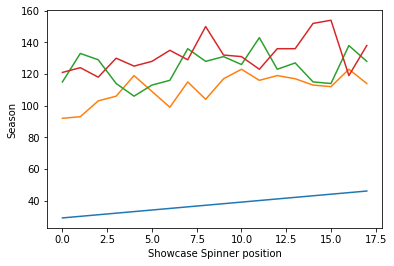

In [96]:
import numpy as np
import matplotlib.pyplot as plt
plt.ylabel('Season')
plt.xlabel('Showcase Spinner position')

plt.plot(ShowcaseStats)
plt.show()

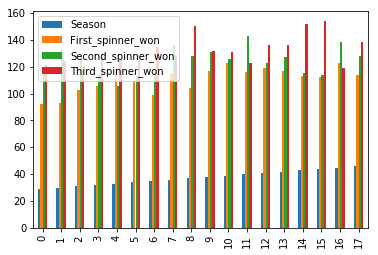

In [104]:
df_showcase.plot.bar()